In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import scipy.stats as st


In [3]:
df1 = pd.read_csv("C:/Users/Admin/Downloads/diamonds.csv")

In [4]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df1.shape

(53940, 11)

# DATA PREPROCESSING
1.Data cleaning
2.Identifying and removing outliers
3.Encoding categorical variables

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


The first column is an index ("Unnamed: 0") and thus we are going to remove it.

In [7]:
df1.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [8]:
#Dropping dimentionless diamonds
df1 = df1.drop(df1[df1["x"]==0].index)
df1 = df1.drop(df1[df1["y"]==0].index)
df1 = df1.drop(df1[df1["z"]==0].index)


In [9]:
df1= df1.drop(["Unnamed: 0"],axis=1)
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
df1.shape

(53920, 10)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

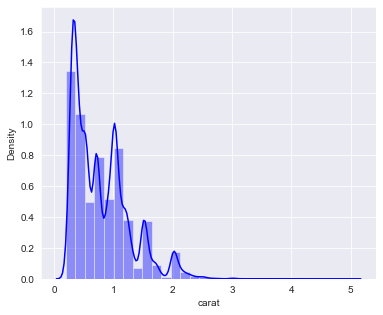

In [11]:
#get the distribution plot for the column carat and price to get the idea about the
#collection of diamonds in our data set 
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
sns.distplot(df1["carat"],kde=True,color='blue',bins=30)

kde is sum of all the normal distributions around a rugplot

# HISTOGRAM FOR THE COLUMN CARAT

<AxesSubplot:ylabel='Frequency'>

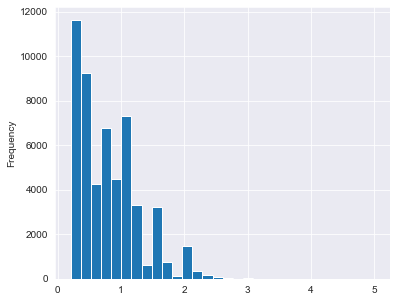

In [12]:
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
df1['carat'].plot.hist(bins=30)

# BAR DIAGRAM FOR THE CATEGORICAL COLUMNS

In [13]:
df1['cut'].value_counts()

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

Text(0.5, 1.0, 'Ploting cut of Diamond')

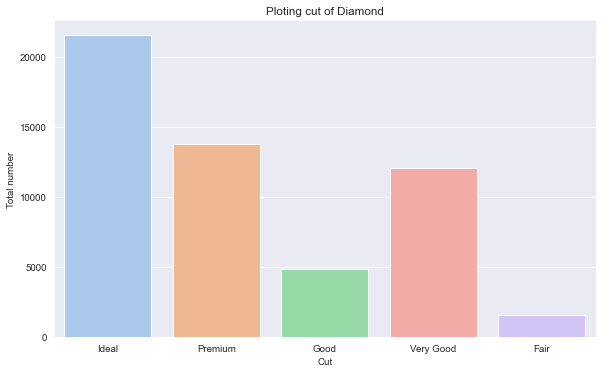

In [14]:
plt.figure(figsize=(10,6), dpi=70)
sns.countplot(x='cut',data=df1,palette='pastel')
plt.xlabel('Cut')
plt.ylabel('Total number')
plt.title('Ploting cut of Diamond')

In [15]:
df1['color'].value_counts()

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Text(0.5, 1.0, 'Ploting color of Diamond')

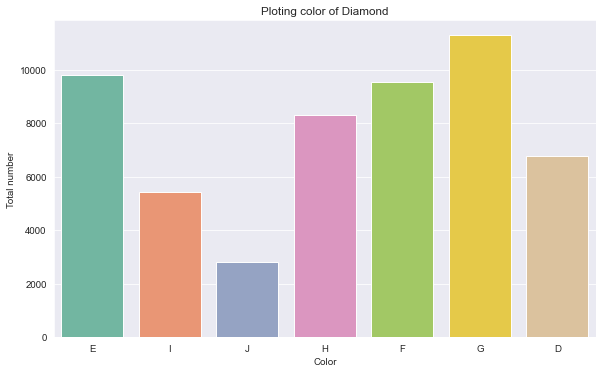

In [16]:
plt.figure(figsize=(10,6), dpi=70)
sns.countplot(x='color',data=df1,palette='Set2')
plt.xlabel('Color')
plt.ylabel('Total number')
plt.title('Ploting color of Diamond')

# Plot for clarity

In [17]:
df1['clarity'].value_counts()

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

Text(0.5, 1.0, 'Ploting clarity of Diamond')

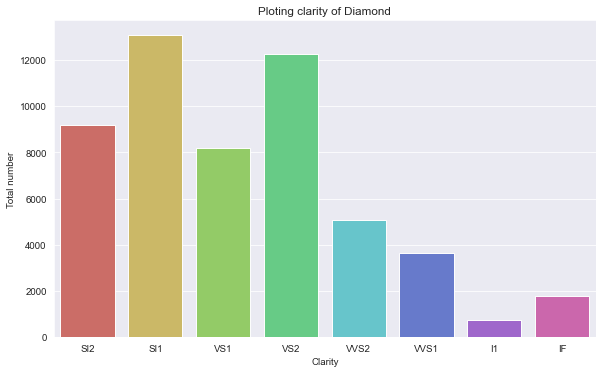

In [18]:
plt.figure(figsize=(10,6), dpi=70)
sns.countplot(x='clarity',data=df1,palette='hls')
plt.xlabel('Clarity')
plt.ylabel('Total number')
plt.title('Ploting clarity of Diamond')

(array([3.0000e+00, 0.0000e+00, 1.1000e+01, 2.6800e+02, 1.2071e+04,
        4.0350e+04, 1.1320e+03, 7.8000e+01, 4.0000e+00, 3.0000e+00]),
 array([43. , 46.6, 50.2, 53.8, 57.4, 61. , 64.6, 68.2, 71.8, 75.4, 79. ]),
 <BarContainer object of 10 artists>)

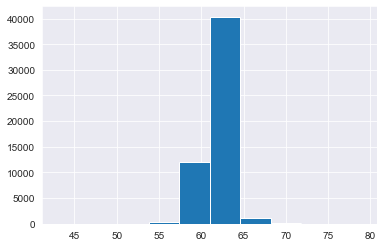

In [19]:
plt.hist(df1['depth'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

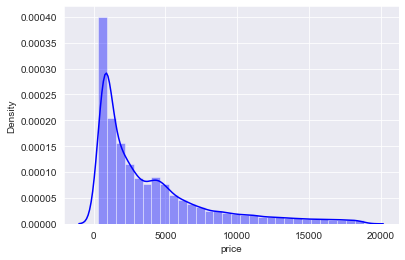

In [20]:
sns.distplot(df1['price'],kde=True,color='blue',bins=30)

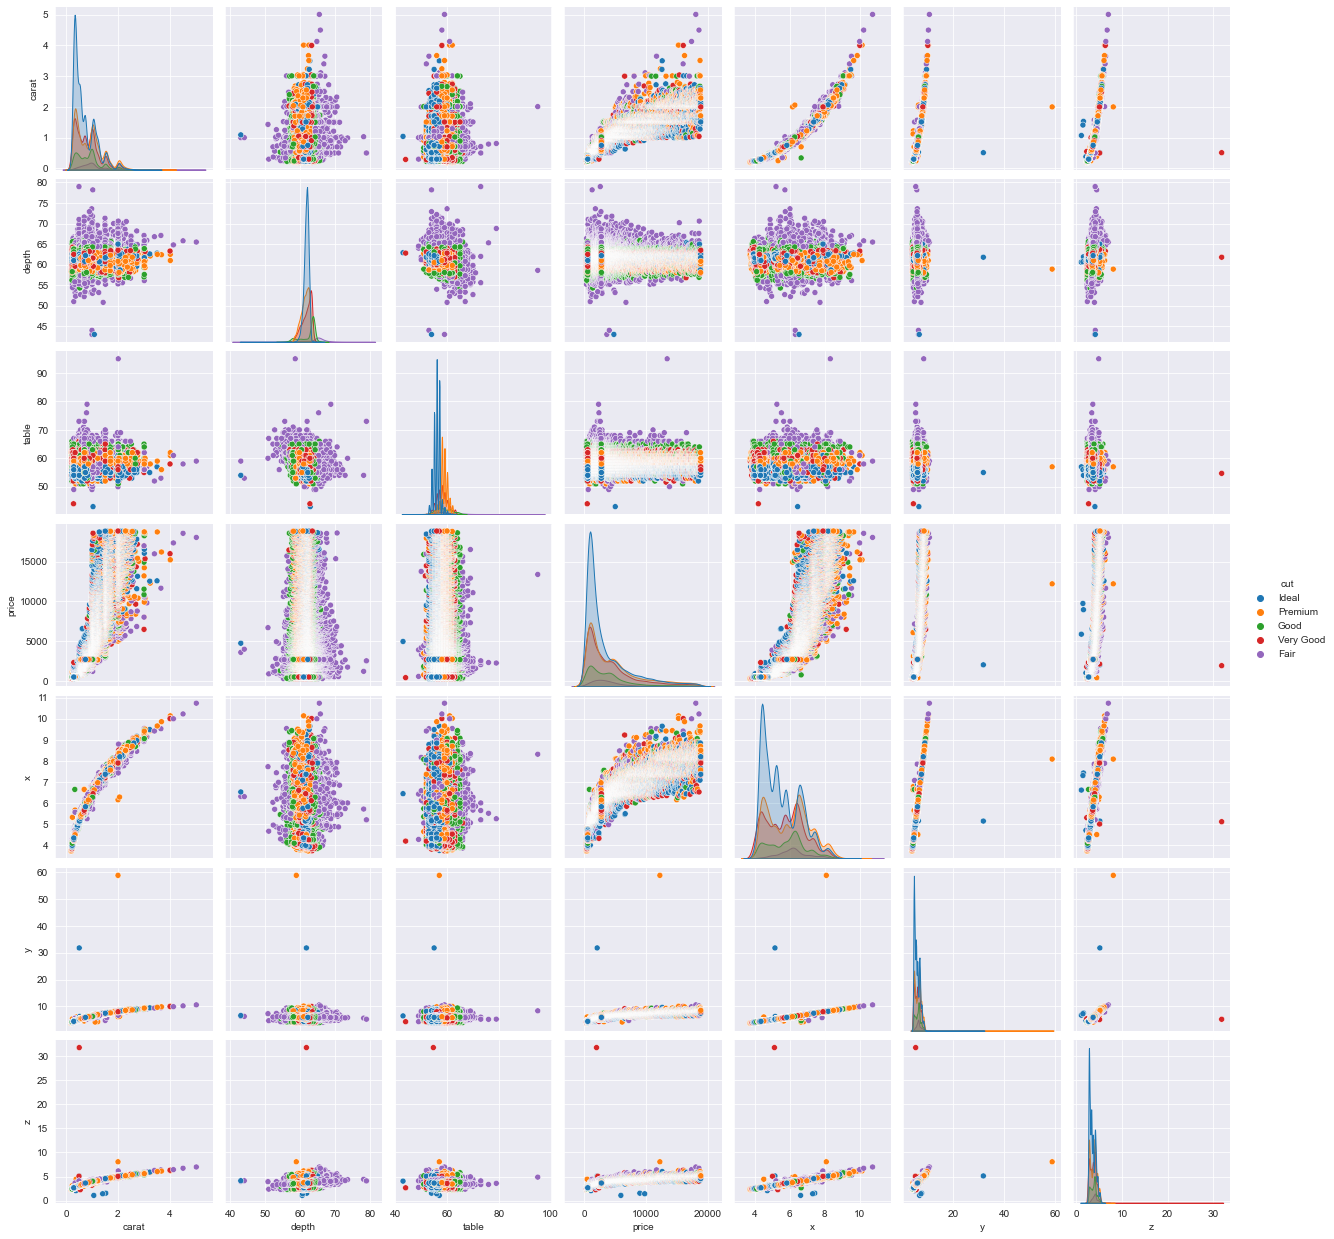

In [21]:
sns.pairplot(df1,hue='cut')

# OUTLIER DETECTION

A few points to notice in these pair plots
There are some features with datapoint that are far from the rest of the dataset which 
will affect the outcome of our regression model.

"y" and "z" have some dimensional outlies in our dataset that needs to be eliminated.

The "depth" should be capped but we must examine the regression line to be sure.

The "table" featured should be capped too.

Let's have a look at regression plots to get a close look at the outliers.

<AxesSubplot:xlabel='price', ylabel='depth'>

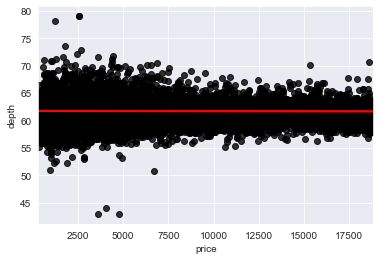

In [22]:
sns.regplot(x="price", y="depth", data=df1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

<AxesSubplot:xlabel='price', ylabel='z'>

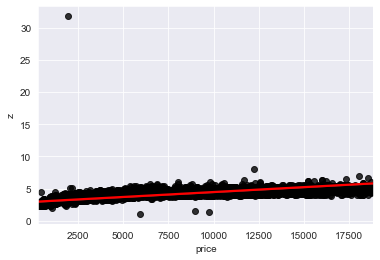

In [23]:
sns.regplot(x="price", y="z", data=df1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

<AxesSubplot:xlabel='price', ylabel='table'>

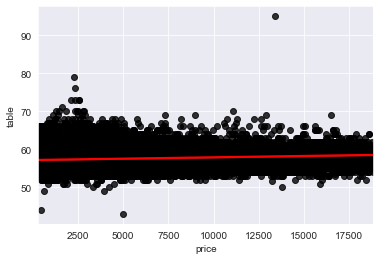

In [24]:
sns.regplot(x="price", y="table", data=df1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

<AxesSubplot:xlabel='price', ylabel='y'>

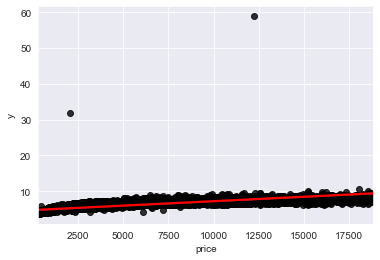

In [25]:
sns.regplot(x="price", y="y", data=df1,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

We can clearly spot outliers in these attributes. 

Next up, we will remove these data points.

In [26]:
#Dropping the outliers. 
df1 = df1[(df1["depth"]<75)&(df1["depth"]>45)]
df1 = df1[(df1["table"]<80)&(df1["table"]>40)]
df1 = df1[(df1["x"]<30)]
df1 = df1[(df1["y"]<30)]
df1 = df1[(df1["z"]<30)&(df1["z"]>2)]
df1.shape

(53907, 10)

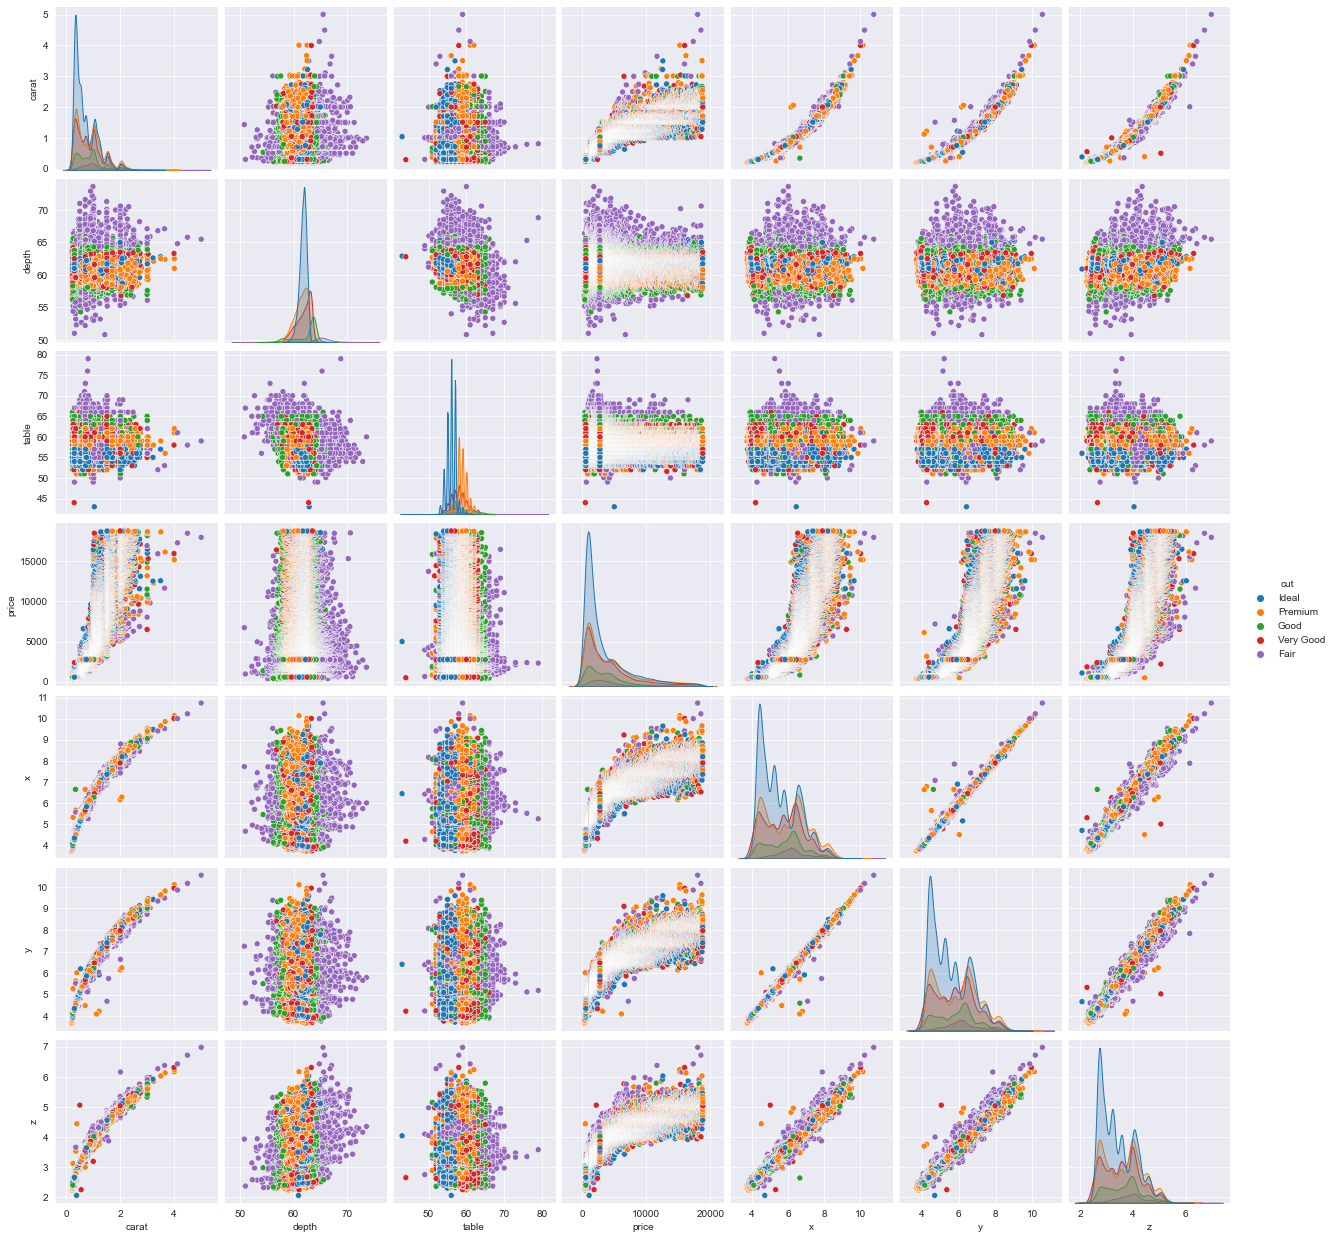

In [27]:
sns.pairplot(df1,hue='cut')

<AxesSubplot:xlabel='cut', ylabel='price'>

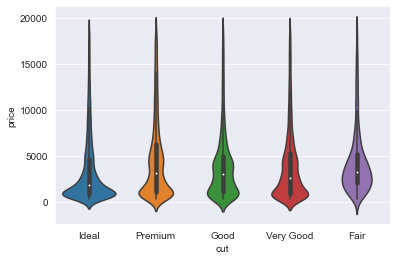

In [28]:
sns.violinplot(x='cut',y='price',data=df1)
#sns.swarmplot(x='cut',y='price',data=df1,color='black')

#good for EDA. combination of violin plot and swarmplot


<AxesSubplot:>

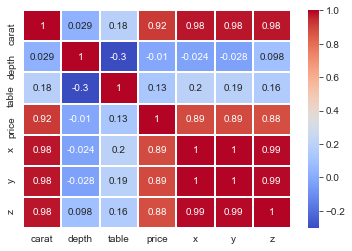

In [29]:
#plotting correlation between the features

dftc=df1.corr()
sns.heatmap(dftc,cmap='coolwarm',linecolor='white',annot=True,linewidths=1)

In [30]:
# Get list of categorical variables

s = (df1.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [31]:
# Make copy to avoid changing original data 
label_data = df1.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [32]:
#model : multiple linear regression
mlr=smf.ols(formula="price ~ carat+depth+table+x+y+z",data=label_data).fit()

In [33]:
#Normality
res = mlr.resid

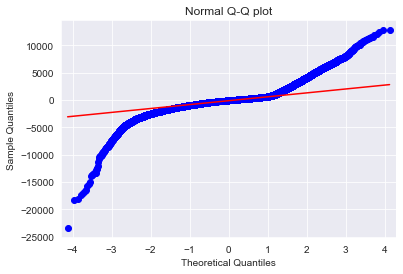

In [34]:
#Q-Q Plot
fig = sm.qqplot(data=res,line="q",dist=st.norm)
plt.title("Normal Q-Q plot")
plt.show()

red line: quantile's reg line fit
    
Q-Q plot is a visual test whether points are within quantile's reg line fit

if points are outside the red line , the linear reg errors are assumed to be non-normal
if points are on the red line , linear reg errors are assumed to be normal

# JARQUE-BERA TEST

In [35]:
jbtest = sms.jarque_bera(res)
print("JB: ",jbtest[0],"JB_p-value: ", jbtest[1])

JB:  380249.53019715316 JB_p-value:  0.0


hence null hypothesis is rejected and we claim that errors are not normal

# DOING BASIC TRAIN TEST SPLIT

In [36]:
independent = label_data[['carat','depth','table','x','y','z']]
dependent = label_data['price']


In [43]:
independent.shape

(53907, 6)

In [44]:
dependent.shape

(53907,)

# STEP#4: TRAINING THE MODEL

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.20)

In [46]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [11184.38852334    63.26509578   -95.27095073 -2579.91795102
  3910.72601971 -4440.1291875 ]
Linear Model Coefficient (b):  4661.202417168633


# EVALUATE MODEL

In [53]:
y_predict = regressor.predict( X_test)
y_predict

array([ 576.56765353, 1256.55169203, 5496.30729064, ..., 3376.75990337,
       2294.94710856, 5245.19291124])

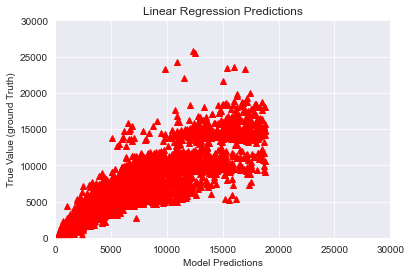

In [56]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 30000)
plt.ylim(0, 30000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [47]:
k1 = X_test.shape[1]
n1 = len(X_test)

In [48]:
k1

6

In [49]:
n1

10782

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n1-1)/(n-k1-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 1484.503 
MSE = 2203748.731783701 
MAE = 880.5283586261008 
R2 = 0.8618098524140041 
Adjusted R2 = 0.8617329019837938


# CHECKING MULTICOLLINEARITY

In [37]:
carat = label_data["carat"]
depth = label_data["depth"]
table = label_data["table"]
x = label_data["x"]
y = label_data["y"]
z = label_data["z"]
price = label_data["price"]

ind_var = label_data.drop("price",axis = 1)

In [38]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(ind_var,price,test_size = 0.2, random_state = 3)

X = sm.add_constant(x_train2)
mod2 = sm.OLS(y_train2 , X)
result2 = mod2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 3.746e+04
Date:                Wed, 01 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:20:03   Log-Likelihood:            -3.7197e+05
No. Observations:               43125   AIC:                         7.440e+05
Df Residuals:                   43115   BIC:                         7.440e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        469.3698   1103.174      0.425      0.670   -1692.873    2631.613
carat       1.128e+04     68.342    165.116      0.000    1.12e+04    1.14e+04
cut           57.4912      6.521      8.816      0.000      44.709      70.273
color       -269.6604      4.002    -67.383      0.000    -277.504    -261.817
clarity      280.1961      3.891     72.011      0.000     272.570     287.823
depth        100.8253     17.255      5.843      0.000      67.006     134.644
table        -88.5826      3.176    -27.895      0.000     -94.807     -82.359
x          -1792.8335    138.191    -12.974      0.000   -2063.691   -1521.976
y           3192.0303    144.382     22.108      0.000    2909.039    3475.022
z          -4299.2786    276.130    -15.570      0.000   -4840.500   -3758.058
==============================================================================
Omnibus:                    11401.841   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           419239.313
Skew:                           0.581   Prob(JB):                         0.00
Kurtosis:                      18.230   Cond. No.                     1.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# RIDGE REGRESSION

In [72]:
from sklearn.linear_model import Lasso, Ridge
regressor_ridge = Ridge(alpha = 70)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_predict2 = regressor_ridge.predict( X_test)
y_predict2

Linear Model Coefficient (m):  [ 9364.04320238  -123.44280496   -99.53773471 -1492.92688454
  1370.99619395  -878.20832212]
Linear Model Coefficient (b):  13610.426835330803


array([ 374.94282994, 1345.34271188, 5508.06789744, ..., 3538.11438612,
       2383.04150163, 5467.39726976])

In [60]:
k = X_test.shape[1]
n = len(X_test)

In [61]:
k

6

In [62]:
n

10782

In [73]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict2)),'.3f'))
MSE = mean_squared_error(y_test, y_predict2)
MAE = mean_absolute_error(y_test, y_predict2)
r2 = r2_score(y_test, y_predict2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 1489.558 
MSE = 2218782.7448248896 
MAE = 922.6182059653696 
R2 = 0.8608671167695052 
Adjusted R2 = 0.8607896413820915


# LASSO REGRESSION

In [88]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 10)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_predict3 = regressor_lasso.predict( X_test)
y_predict3

Linear Model Coefficient (m):  [9567.87039012 -178.32952949 -101.80718566 -750.4870483    -0.
   -0.        ]
Linear Model Coefficient (b):  17464.241322751495


array([ 348.85780932, 1351.45632554, 5423.92056653, ..., 3502.97179746,
       2342.19234289, 5505.0454214 ])

In [89]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict3)),'.3f'))
MSE = mean_squared_error(y_test, y_predict3)
MAE = mean_absolute_error(y_test, y_predict3)
r2 = r2_score(y_test, y_predict3)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 1494.226 
MSE = 2232710.747427167 
MAE = 918.2495613139328 
R2 = 0.8599937355589219 
Adjusted R2 = 0.8599157738339431


In [90]:
# Assigning the featurs as X and trarget as y
X4= label_data.drop(["price"],axis =1)
y4= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X4, y4,test_size=0.2, random_state=3)

In [99]:
!pip install xgboost
#conda install -c conda-forge xgboost
from xgboost import XGBRegressor

In [100]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

In [102]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [103]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1349.074470 
DecisionTree: -747.567042 
RandomForest: -547.822297 
KNeighbors: -822.925919 
XGBRegressor: -543.495082 


# Testing the Model with the best score on the test set

In the above scores, XGBClassifier appears to be the model with 
the best scoring on negative root mean square error.
Let's test this model on a test set and evaluate it with different parameters.

In [104]:
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)

In [105]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9816567197767483
Adjusted R^2: 0.981641393976339
MAE: 275.2341883706595
MSE: 282147.71795375104
RMSE: 531.1757881848071
